# Loading Libraries

In [63]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Loading Dataset

In [64]:
filePath = "C:\\Users\\Sanjiv\\projects\\ML\\poker_data.txt"
names = ['Suite Card1', 'Rank Card1', 'Suite Card2', 'Rank Card2','Suite Card3', 'Rank Card3','Suite Card4', 'Rank Card4','Suite Card5', 'Rank Card5', 'class']
dataset = pandas.read_csv(filePath, names=names)


### Predictive Attribute Information:

- S1 Suit of card #1
      - Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

- C1 Rank of card #1
      - Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

- S2 Suit of card #2
      - Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

- C2 Rank of card #2
      - Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

- S3 Suit of card #3
      - Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

- C3 Rank of card #3
      - Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

- S4 Suit of card #4
      - Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

- C4 Rank of card #4
      - Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

- S5 Suit of card #5
      - Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

- C5 Rank of card 5
      - Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

### Goal Attribute: Poker Hand Type
      
      Ordinal (0-9)

      0: Nothing in hand; not a recognized poker hand 
      1: One pair; one pair of equal ranks within five cards
      2: Two pairs; two pairs of equal ranks within five cards
      3: Three of a kind; three equal ranks within five cards
      4: Straight; five cards, sequentially ranked with no gaps
      5: Flush; five cards with the same suit
      6: Full house; pair + different rank three of a kind
      7: Four of a kind; four equal ranks within five cards
      8: Straight flush; straight + flush
      9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

# Understanding the Data 

#### Statistical Summary of Each Predictive Attribute

In [65]:
print(dataset.describe())

       Suite Card1   Rank Card1  Suite Card2   Rank Card2  Suite Card3  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.501800     6.941000     2.470000     7.043200     2.511400   
std       1.115099     3.783329     1.122565     3.741408     1.122908   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     4.000000     1.000000     4.000000     2.000000   
50%       2.000000     7.000000     2.000000     7.000000     3.000000   
75%       4.000000    10.000000     3.000000    10.000000     4.000000   
max       4.000000    13.000000     4.000000    13.000000     4.000000   

       Rank Card3  Suite Card4   Rank Card4  Suite Card5   Rank Card5  \
count  5000.00000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      6.92380     2.500600     6.925000     2.524200     6.984800   
std       3.75617     1.118682     3.761357     1.113222     3.702771   
min       1.00000     1.000000     1.0000

#### Distribution of the Goal Attribute

In [66]:
print(dataset.groupby('class').size())

class
0    2514
1    2087
2     244
3     111
4      19
5      12
6       9
7       4
dtype: int64


# Looking at Univariate Distributions



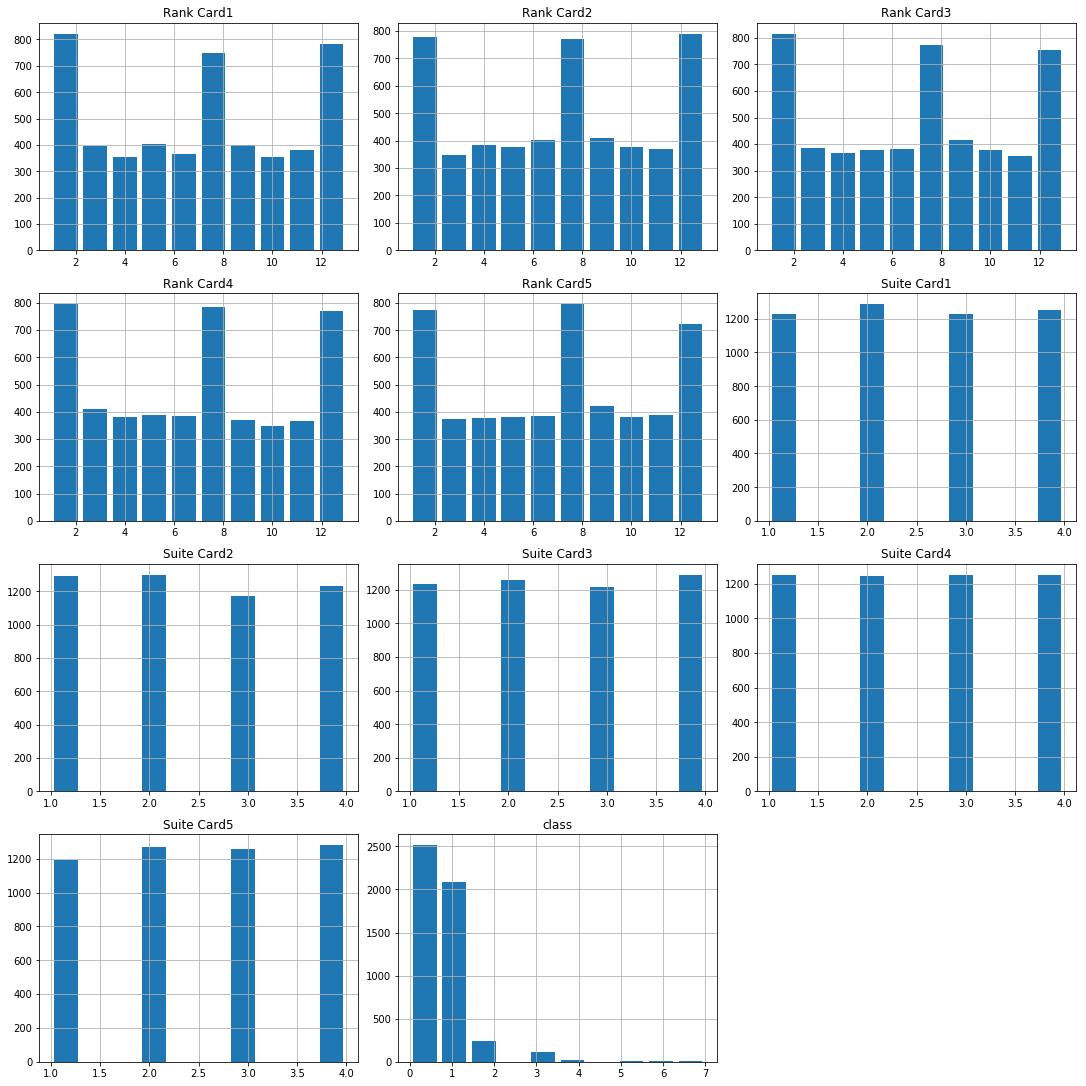

In [67]:
# histogram (getting a good sense of each variable data)
dataset.hist(rwidth = 0.8)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# Looking at Multivariate Distributions



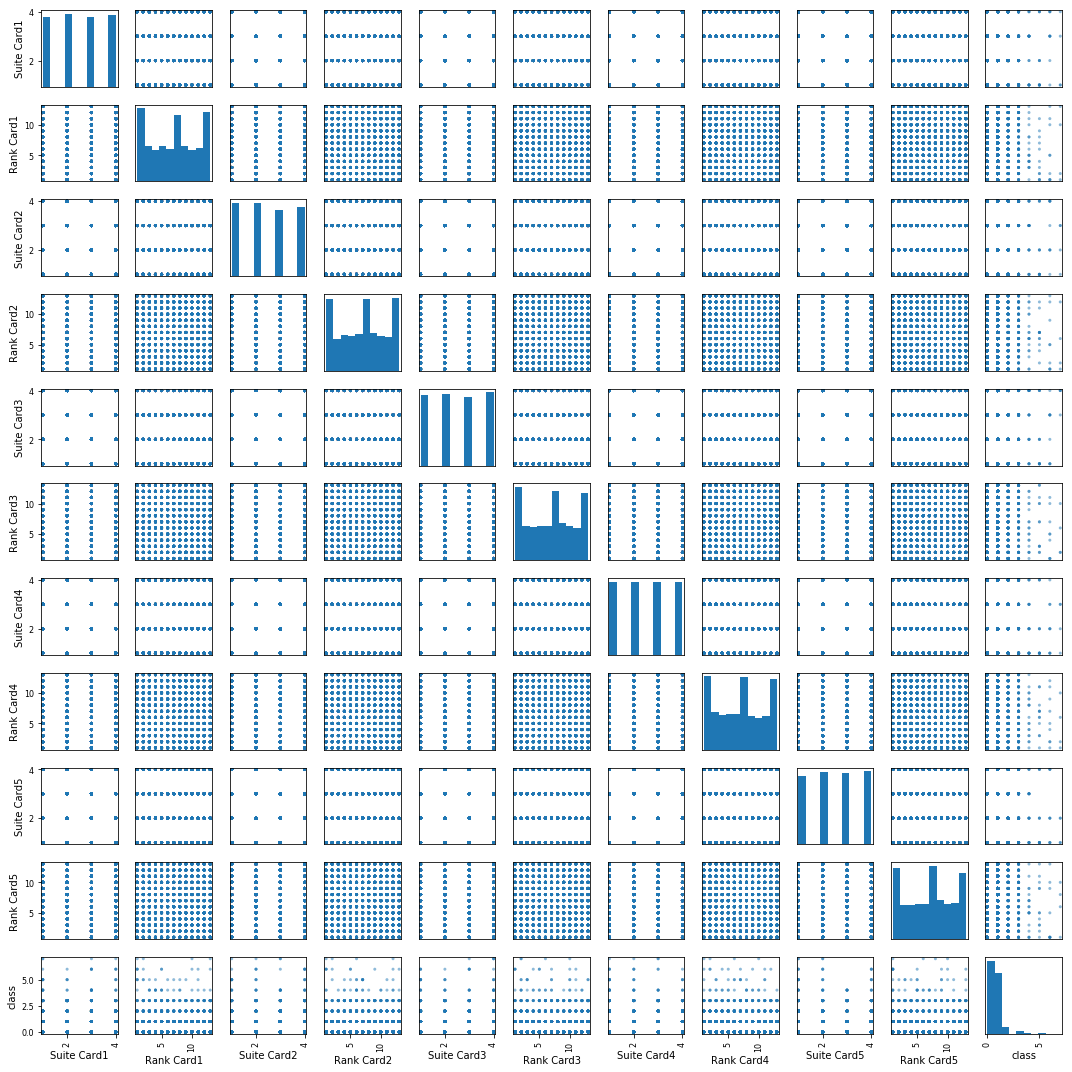

In [68]:
# scatter plot matrix (looking at relationships between variables) 
scatter_matrix(dataset)
plt.tight_layout()
plt.show()

Predictably, there is no linear correlation with the data. I will keep that in mind when choosing algorithms for modeling. Now, I created a validation dataset to test the new models. 80% of the loaded dataset will be used for training, 20% for testing.

# Split-out validation dataset


In [69]:
array = dataset.values
X = array[:,0:4]
X = X.astype('int')
Y = array[:,4]
Y = Y.astype('int')
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [70]:
seed = 7
scoring = 'accuracy'

I kept a random seed to ensure that each evaluation of the algorithm happens with the same data splits.

# Building Models

I don't know which algorithms will be good for this problem, but from the results of Step V, I can tell it's probably a good idea to avoid Logistic Regression.

 - Among classifier algorithms, I'm choosing to test
	- Support Vector Machines (SVM)
	- K-Nearest Neighbors (KNN)
	- Neural Networks (NN)

I also want to test clustering algorithms, but to do that, I will have to reformat my dataset. I'll get to that at some point.

# Checking Classifier Algorithms

In [71]:
models = []
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', MLPClassifier()))
# models.append(('KM', MiniBatchKMeans()))

In [72]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	plt.show()

SVM: 0.247500 (0.022136)
KNN: 0.252250 (0.014162)
NN: 0.240000 (0.030496)


# Results From Algorithmic Testing

Shit, these results show that classifying algorithms are not particularly accurate predictors of this dataset. 

Well, I guess I need to try another modeling technique. I think relational modeling could be better. 

Using the pgmpy library, I'm going to create a Bayesian network to see if it yields better results.  

# Relational Modeling